In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure


# Importation de la BDD Spam

In [2]:
spam = pd.read_csv(r"C:/Users/Takwa Aldroe/Desktop/S7-DIA/PythonForDataAnalysis/projet_Spam/spambase.data")

In [3]:
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
word_freq_make                4601 non-null float64
word_freq_address             4601 non-null float64
word_freq_all                 4601 non-null float64
word_freq_3d                  4601 non-null float64
word_freq_our                 4601 non-null float64
word_freq_over                4601 non-null float64
word_freq_remove              4601 non-null float64
word_freq_internet            4601 non-null float64
word_freq_order               4601 non-null float64
word_freq_mail                4601 non-null float64
word_freq_receive             4601 non-null float64
word_freq_will                4601 non-null float64
word_freq_people              4601 non-null float64
word_freq_report              4601 non-null float64
word_freq_addresses           4601 non-null float64
word_freq_free                4601 non-null float64
word_freq_business            4601 non-null float64
word_freq

In [5]:
spam.shape

(4601, 58)

In [6]:
spam.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [7]:
spam['class'].value_counts() 
#0 the mail is not a spam
#1 the mail is a spam

0    2788
1    1813
Name: class, dtype: int64

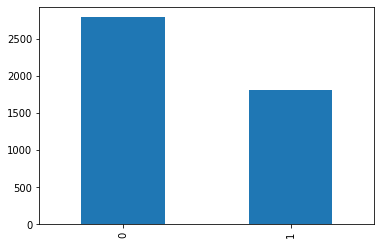

In [8]:
spam['class'].value_counts().plot(kind="bar")

In [9]:
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [10]:
#On regarde s'il y a des valeurs manquantes
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

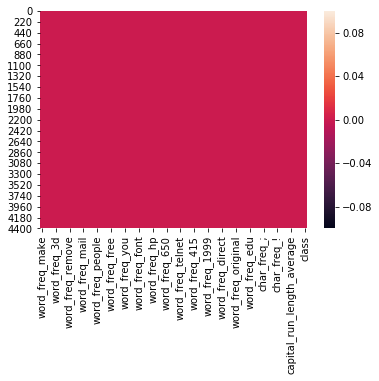

In [11]:
sns.heatmap(spam.isnull())
#on regarde les valeurs manquantes

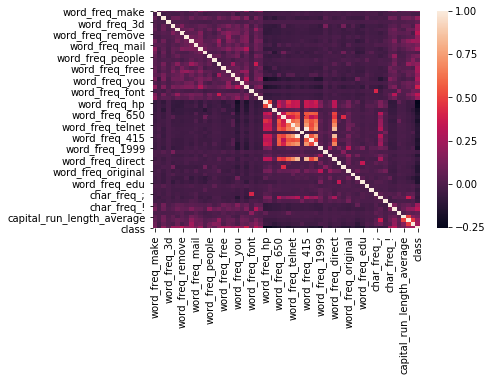

In [12]:
sns.heatmap(spam.corr())

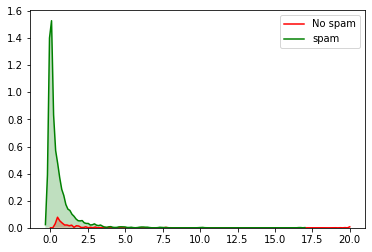

In [13]:
#on regarde la proba que ce soit un spam ou pas quand on a le mot 'email' dans notre mail 
plot = sns.kdeplot(spam.loc[ spam["class"] == 0, "word_freq_free"], color="Red", shade=True)
plot = sns.kdeplot(spam.loc[ spam["class"] == 1, "word_freq_free"], color="Green", shade=True)
plot.legend(["No spam", "spam"])

0.0

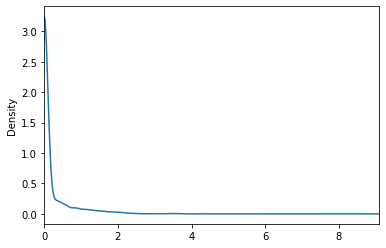

In [14]:
listevaleur=[]
for i in spam["word_freq_email"]:
    if i>1:
        listevaleur.append(1) 
    else:
        listevaleur.append(0)
listevaleur
#listevaleur.value_counts().plot(kind="bar")

spam.word_freq_email.plot(kind="density", xlim=(spam.word_freq_email.min(), spam.word_freq_email.max()))
spam.word_freq_email.min()

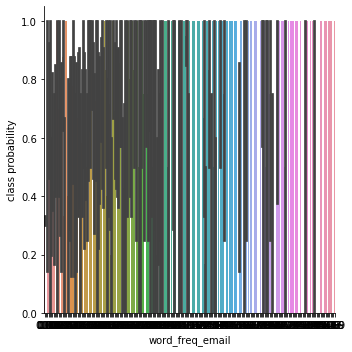

In [15]:
sns.catplot(x="word_freq_email", y="class", kind="bar", data=spam).set_ylabels("class probability")


In [16]:
#on regarde la correlation entre les features et la classe
dict_1={}
dict_1=dict(spam.corr()['class'])
dict_1

{'word_freq_make': 0.1262075747276322,
 'word_freq_address': -0.030223579212021543,
 'word_freq_all': 0.1969879726831455,
 'word_freq_3d': 0.05737138961858829,
 'word_freq_our': 0.2419204377148765,
 'word_freq_over': 0.232604300172187,
 'word_freq_remove': 0.3321174156141586,
 'word_freq_internet': 0.20680847576170805,
 'word_freq_order': 0.23155143128601532,
 'word_freq_mail': 0.13896211329514088,
 'word_freq_receive': 0.23452927138249544,
 'word_freq_will': 0.007740737297956368,
 'word_freq_people': 0.13292672586847548,
 'word_freq_report': 0.060027316399873264,
 'word_freq_addresses': 0.19590245671258405,
 'word_freq_free': 0.26321469903669603,
 'word_freq_business': 0.2632039828223917,
 'word_freq_email': 0.20420813879714014,
 'word_freq_you': 0.2736512865572106,
 'word_freq_credit': 0.1897611485080607,
 'word_freq_your': 0.3832338192835756,
 'word_freq_font': 0.09186009631515232,
 'word_freq_000': 0.3347870388457389,
 'word_freq_money': 0.21611098224724426,
 'word_freq_hp': -0.256

### On créé une deuxième sans les features avec correlation faible

In [17]:
list_features=[]
for key,values in dict_1.items():
    if abs(values)<0.2:
        list_features.append(key)

#lets drop the features which have coorelation less than <0.2
spam2 = spam.drop(list_features,axis=1)
spam2=spam2[1:]
spam=spam[1:]
spam2

,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_receive,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_your,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,char_freq_!,char_freq_$,capital_run_length_longest,capital_run_length_total,class
1,0.14,0.28,0.21,0.07,0.00,0.21,0.14,0.07,0.28,3.47,1.59,0.43,0.43,0.0,0.0,0.372,0.180,101,1028,1
2,1.23,0.19,0.19,0.12,0.64,0.38,0.06,0.06,1.03,1.36,0.51,1.16,0.06,0.0,0.0,0.276,0.184,485,2259,1
3,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,0.31,0.00,0.00,0.0,0.0,0.137,0.000,40,191,1
4,0.63,0.00,0.31,0.63,0.31,0.31,0.31,0.00,0.00,3.18,0.31,0.00,0.00,0.0,0.0,0.135,0.000,40,191,1
5,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.00,0.31,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.00,0.0,0.0,0.000,0.000,3,88,0
4597,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.00,0.00,0.00,0.0,0.0,0.353,0.000,4,14,0
4598,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.90,1.50,0.30,0.00,0.00,0.0,0.0,0.000,0.000,6,118,0
4599,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.32,0.00,0.00,0.0,0.0,0.000,0.000,5,78,0


### On sépare les features de la classe

In [18]:
y=spam['class']
x=spam.drop(['class'],axis=1)
y2=spam2['class']
x2=spam2.drop(['class'],axis=1)

### On split la bdd en train et test

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,random_state=0,test_size=0.2)

# Application les modèles

### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
lr=LogisticRegression(max_iter=10000)
lr2=LogisticRegression(max_iter=10000)

lr.fit(x_train,y_train)
lr2.fit(x2_train,y2_train)
pred_1=lr.predict(x_test)
pred2_1=lr2.predict(x2_test)
score_1=accuracy_score(y_test,pred_1)
score2_1=accuracy_score(y2_test,pred2_1)


#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(lr, X=x_test, y_true=y_test)

C:\Users\Takwa Aldroe\Anaconda3\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Takwa Aldroe\Anaconda3\Nouveau dossier\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
list_scores=[]
list_models=[]

list_scores.append(score_1)
list_models.append('Logistic Regression')

In [23]:
#score_1
#score2_1

print("Accuracy Score for Logistic Regression : ", score_1)

Accuracy Score for Logistic Regression :  0.9380434782608695


### Random Forest


In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc2=RandomForestClassifier()

rfc.fit(x_train,y_train)
rfc2.fit(x2_train,y2_train)

pred_2=rfc.predict(x_test)
pred2_2=rfc2.predict(x2_test)

score_2=accuracy_score(y_test,pred_2)
score2_2=accuracy_score(y2_test,pred2_2)

list_scores.append(score_2)
list_models.append('Random Forest')

C:\Users\Takwa Aldroe\Anaconda3\Nouveau dossier\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Takwa Aldroe\Anaconda3\Nouveau dossier\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [25]:
#score_2
#score2_2

print("Accuracy Score for Random Forest : ", score_2)

Accuracy Score for Random Forest :  0.9521739130434783


### Boosting

In [26]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

x_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_train.columns.values]
x_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in x_test.columns.values]

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb2=XGBClassifier()

xgb.fit(x_train,y_train)
xgb2.fit(x2_train,y2_train)

pred_3=xgb.predict(x_test)
pred2_3=xgb2.predict(x2_test)

score_3=accuracy_score(y_test,pred_3)
score2_3=accuracy_score(y2_test,pred2_3)

list_scores.append(score_3)
list_models.append('Boosting')

In [27]:
#score_3
#score2_3
print("Accuracy Score for Boosting : ", score_3)

Accuracy Score for Boosting :  0.9532608695652174


### Knn

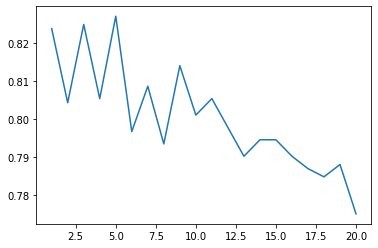

In [28]:
from sklearn.neighbors import KNeighborsClassifier
list_1=[]
list_2=[]
for i in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn2=KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(x_train,y_train)
    knn2.fit(x2_train,y2_train)
    
    preds=knn.predict(x_test)
    preds2=knn2.predict(x2_test)

    scores=accuracy_score(y_test,preds)
    scores2=accuracy_score(y2_test,preds2)
    
    list_1.append(scores)
    list_2.append(scores2)

    
sns.lineplot(x=list(range(1,21)),y=list_1)

list_scores.append(max(list_1))
list_models.append('kneighbors')

In [29]:
max(list_1)
#max(list_2)

print("Accuracy Score for Knn : ", max(list_1))

Accuracy Score for Knn :  0.8271739130434783


### NaiveBayes

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [31]:
mnb = MultinomialNB(alpha=1.9)         
mnb2 = MultinomialNB(alpha=1.9)         

mnb.fit(x_train,y_train)
mnb2.fit(x2_train,y2_train)

pred_4= mnb.predict(x_test)
score_4=accuracy_score(pred_4,y_test)

pred2_4= mnb2.predict(x2_test)
score2_4=accuracy_score(pred2_4,y2_test)

list_scores.append(score_4)
list_models.append('Naive Bayes')

print("Accuracy Score for Naive Bayes : ", score_4)

Accuracy Score for Naive Bayes :  0.8097826086956522


## Synthèse des modèles

Text(0, 0.5, 'accuracy scores')

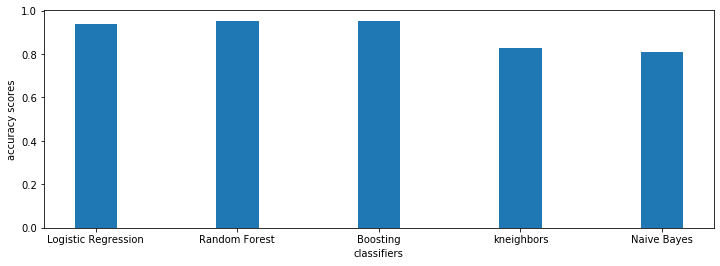

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.bar(list_models,list_scores,width=0.3)
plt.xlabel('classifiers')
plt.ylabel('accuracy scores')

# Exportation des modèles

In [33]:
!pip install joblib
import joblib

In [34]:
joblib.dump(xgb,'./model_boost.joblib')
joblib.dump(lr,'./model_lr.joblib')
joblib.dump(rfc,'./model_rfc.joblib')
joblib.dump(mnb,'./model_mnb.joblib')

['./model_mnb.joblib']

## Création d'une fonction qui comptabilise les mots/charactères d'un mail

In [35]:
#On va creer une fonction qui part d'un mail et qui nous donne le nombre de 
#chaque mots ou carectères qui sont dans les features
import collections
import re
def comptage(mail):
    listemots=["make","address","all","3d","our","over","remove","internet","order","mail","receive","will","people","report",
              "addresses","free","business","email","you","credit","your","font","000","money","hp","hpl","george","650","lab",
              "labs","telnet","857","data","415","85","technology","1999","parts","pm","direct","cs","meeting","original",
              "project","re","edu","table","conference"]
    listechars=[';','(','[','!','$','#']
    listemajuscules=['capital_run_length_average', 
                     'capital_run_length_longest', 'capital_run_length_total']
   
    dic = {}
    text_split = re.split(r'\W+', mail)
    text_split_count = collections.Counter(text_split)
    for i in range(48):
        if listemots[i] in text_split_count.keys() : dic[listemots[i]] = float(100*text_split_count[listemots[i]]/len(text_split))
        else : dic[listemots[i]] = float(0)

    for i in range(6):
        dic[listechars[i]] = float(100*mail.count(listechars[i])/(len(mail)- mail.count(' ')))

    all_uppercase_sequence = re.findall(r"[A-Z]+", mail)
    sum_uppercase = 0

    for sequence in all_uppercase_sequence:
        sum_uppercase += len(sequence)

    if len(all_uppercase_sequence)!=0:
        dic['capital_run_length_average'] = int(sum_uppercase/len(all_uppercase_sequence))
        dic['capital_run_length_longest'] = int(len(max(all_uppercase_sequence, key=len)))
    else:
        dic['capital_run_length_average'] = 0
        dic['capital_run_length_longest'] = 0
    
    dic['capital_run_length_total'] = int(sum_uppercase)

    return dic

def fonctionfinal(mail):
    comptage(mail)
    res=comptage(mail)
    liste=[]
    for i,j in res.items():
        liste.append(j)
    listefinal=pd.DataFrame(liste) 
    listefinal=listefinal.T
    colonne=['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq__', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
    listefinal.columns=colonne
    listefinal=listefinal.astype(float)
    listefinal["capital_run_length_average"]=listefinal["capital_run_length_average"].astype(int)
    listefinal["capital_run_length_longest"]=listefinal["capital_run_length_longest"].astype(int)
    listefinal["capital_run_length_total"]=listefinal["capital_run_length_total"].astype(int)
    return listefinal

In [36]:
#On teste la fonction qu'on vient de créer

mail="Hello, YOU you win a free 3d money $"
mail2="ALDROE Takwa$"
prediction=xgb.predict(fonctionfinal(mail2))

retour=''
if prediction[0]==1:
    retour='The mail is a spam'
if prediction[0]==0:
        retour='The mail is not a spam'
retour

'The mail is not a spam'

In [38]:
xgb.predict_proba(fonctionfinal(mail))

array([[0.13001877, 0.8699812 ]], dtype=float32)